In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## (1) Preprocessing: Detect face and eyes

In [2]:
img = cv2.imread("./test_images/sharapova1.jpeg")
img.shape

(275, 183, 3)

The shape has 3 dimensions. The first tow are the x and y cordinates and the third dimension is the RGB channels.

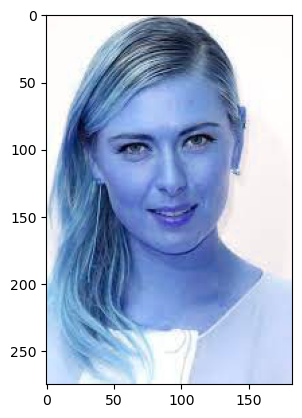

In [3]:
plt.imshow(img)

You can do as follows if you want to change this to a grey image

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(275, 183)

In [5]:
gray

array([[251, 251, 251, ..., 252, 252, 252],
       [251, 251, 251, ..., 252, 252, 252],
       [251, 251, 251, ..., 252, 252, 252],
       ...,
       [234, 234, 234, ..., 224, 224, 224],
       [234, 234, 234, ..., 224, 224, 224],
       [234, 234, 234, ..., 224, 224, 224]], dtype=uint8)

This is a N dimensional array with numbers from 0 to 255

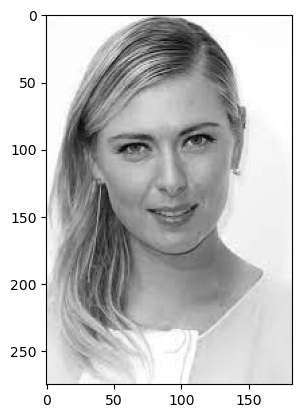

In [6]:
plt.imshow(gray, cmap="gray")

You are going to detect the face as well as the eyes from the above image.
This is done using the Haar Cascade

The below article describes face detection using Haar Cascades:
https://docs.opencv.org/3.4/d2/d99/tutorial_js_face_detection.html

In [7]:
face_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
# Here the gray means the gray image of Maria Sharapova
faces

array([[ 25,  49, 127, 127]])

This detects an array of faces. If there were two faces it will detect two faces. The 4 values here are x, y, width, and height

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(25, 49, 127, 127)

How you can draw a rectangle around that face using opencv

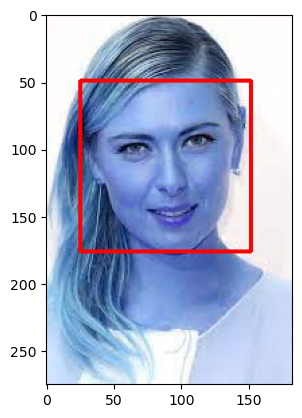

In [9]:
face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
# This draws a rectangle starting from cordinates (x,y) and its colour is red
plt.imshow(face_img)


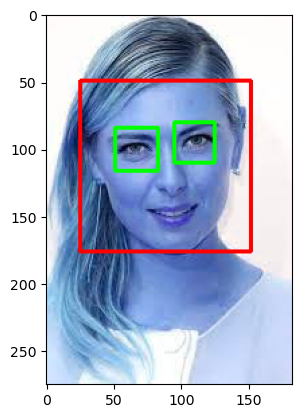

In [10]:
cv2.destroyAllWindows()
# Here we iterate through all the faces
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # First we draw the face images, which is the red rectangle drawn aroung the face
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    # In this code the roi_color is the rectangle that you see on the face
    # After that we apply eye cascasde
    eyes = eye_cascade.detectMultiScale(roi_gray)
    # WE run a for loop as there can be multiple eyes
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        # This rectangle would be in green color
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

If you just plot the roi color you will notice that we get a cropped face


ROI = Region of Interest


We are interested in the facial region of all the images in our dataset. We'll be cropping the face region from all the images and we will be storing them in a different folder to be used to train our model.

## (2) Preprocessing: Crop the facial region of the image

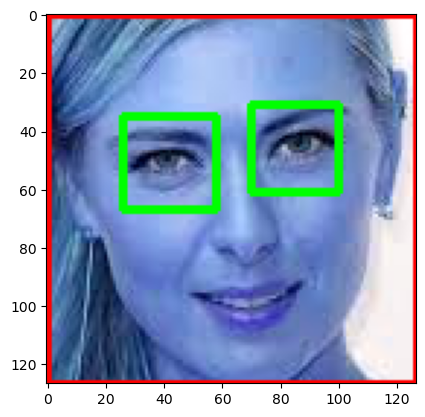

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap="gray")

## (3) Preprocessing: Load image, detect face. If eyes >= 2, then save and crop the face region

The below function is to get cropped images of the faces of the images after the face and if eyes>=2 are detected.

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    # The image will be supplied using an image path as an input this function
    # Reading the image
    img = cv2.imread(image_path)
    if img is None:
        return None
    
    # Converts the image from BGR to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detects faces using Haar Cascade
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

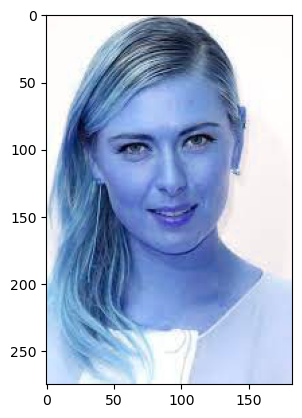

In [13]:
original_image = cv2.imread("./test_images/sharapova1.jpeg")
plt.imshow(original_image)

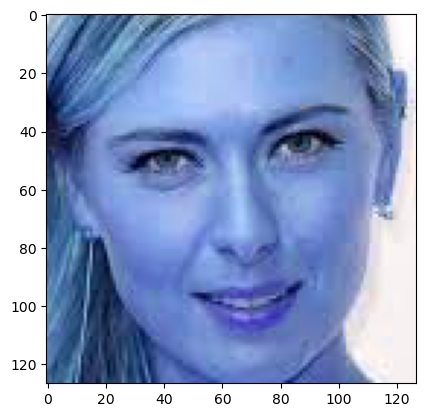

In [14]:
cropped_image = get_cropped_image_if_2_eyes("./test_images/sharapova1.jpeg")
plt.imshow(cropped_image)

If the face is not clear and the two eyes are not clearly visible we want this function to return nothing because we want to ignore that image.

So lets test this using the second test image

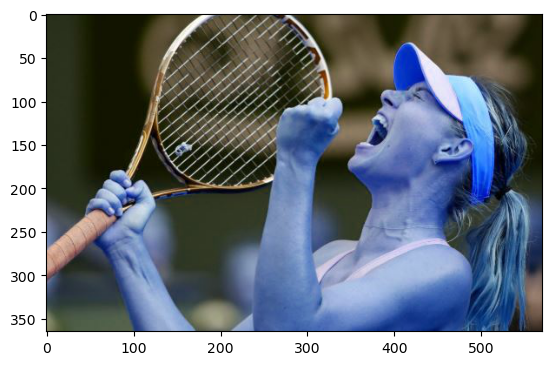

In [15]:
org_image_obstructed = cv2.imread("./test_images/sharapova2.jpeg")
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("./test_images/sharapova2.jpeg")
cropped_image_no_2_eyes

You get nothing when you run this function. (In this image the face is obstructed)

In [17]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

First we will store the path of all the end user subfolders in a python list

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
# This goes through all the subdirectories in the dataset folder
    if entry.is_dir():
        img_dirs.append(entry.path)
        # The names of the subdirectories will be stored in the img_dirs variable.

In [19]:
img_dirs

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serana_williams',
 './dataset/virat_kohli']

The below code will generate the cropped folder

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
# If the folder exists
    shutil.rmtree(path_to_cr_data)
    # ..then remove it
os.mkdir(path_to_cr_data)
# This line will create the folder

In [21]:
cropped_image_dirs = []
# This is similar to img_dirs but it contains the cropped folder path for each of our 5 players

celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    # Spliitting the string and taking the last element
    
    
    celebrity_file_names_dict[celebrity_name] = []
    
    #next we iterrate through all the images
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
        # which means the face and eyes are clearly visible
        # Now you can store that image to a cropped folder
        
            cropped_folder = path_to_cr_data + celebrity_name
            # In "cropped" folder you need to create a subfolder first for your player
            
            if not os.path.exists(cropped_folder):
            # if this folder doesn't exist
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            # Here the first argument is the file path
            # Second argument is the region of interest
            # Once you execute this line your cropped image will be stored in the cropped folder
            
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            # Here we store the names of all those image filepaths into a dictionary
            # This dictionary will be useful later on 
            # The key in this dictionary will be the name of the celebrity
            # The value will be the list of file paths
            count += 1
                

Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serana_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


You should manually examine the cropped folder and delete any unwanted images.

In [22]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\\lionel_messi25.png',
  './dataset/cropped/lionel_messi\\lionel_messi26.png',
  './dataset/cropped/lionel_messi\\lionel_messi27.png',
  './dataset/cropped/lionel_messi\\lionel_messi28.png',
  './dataset/cropped/lionel_messi\

This dictionary has the key which is the player name and the values are the cropped images

## (3) Preprocessing: Use wavelet transform as a feature for training our model

In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [23]:
import numpy as np
import pywt
import cv2

def w2d(img, mode="haar", level=1):
    imArray = img
    #Datatype conversions
    
    #convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    
    # convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H
    

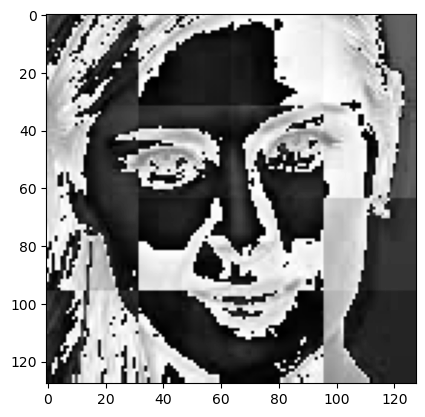

In [24]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap="gray")

By creating this black and white image you are extracting important important facial features that are very useful for our classifier

Now we are going to get this wavelet transformed image for all the images for our cropped folder

Both the row image as well as the wavelet image gives information for our classifier

In [25]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serana_williams': 3,
 'virat_kohli': 4}

In [26]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
# Here training_files are the list of images
    for training_image in training_files:
        # First the image is read
        img = cv2.imread(training_image)
        
        if img is None:
            continue
        # Now you do scaling as the images should be in the same size
        scalled_raw_img = cv2.resize(img, (32, 32))
        
        # Now you get the wavelet transformed image
        img_har = w2d(img,'db1',5)
        
        # You scale that image as well
        scalled_img_har = cv2.resize(img_har, (32, 32))
        
        # You vertically stack those images
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        # scaled image has 32*32*3 because there are 3 channels (r,g,b) 
        
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [27]:
len(X)

162

This means there will be 160 images in the cropped image folder

In [28]:
len(X[0])

4096

The size of each image is 4096. You get that answer as follows

In [29]:
32*32*3 + 32*32

4096

In [30]:
X[0]

array([[ 28],
       [ 34],
       [ 29],
       ...,
       [194],
       [193],
       [202]], dtype=uint8)

In [31]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(162, 4096)

Now the images are represented as a float number. This is done to avoid the warnings that the sklearn apis will give

In [32]:
X[0]

array([ 28.,  34.,  29., ..., 194., 193., 202.])

In [33]:
y[0]

0

The data cleaning process is done. Now we are ready to train our model

We will use SVM with rbf kernel tuned with heuristic finetuning

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Creating a sklearn pipeline
# To scale our data
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C=10))])
# You should first scale the X_train. You can also use minmaxscaler
# And then in the next step you are creating an SVM model with certain parameters
# The parameters here are randomly chosen
# The parameters are fine tuned later on using gridserachcv

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)
# Here you can test how well your model is performing

0.7317073170731707

In [37]:
len(X_test)

41

If you want detailed statistics then sklearn has classification report

In [38]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.83      0.83      0.83        12
           2       0.25      0.33      0.29         3
           3       0.78      0.78      0.78         9
           4       1.00      0.60      0.75        10

    accuracy                           0.73        41
   macro avg       0.69      0.68      0.67        41
weighted avg       0.78      0.73      0.74        41



Precision refers to the number of true positives divided by the total number of positive predictions.
$$Precision = \frac{True Positives}{True Positives + False Positives}$$


$$Recall = \frac{True Positives}{True Positives + False Negatives}$$


$$F_1 Score = 2\frac{Precision \cdot Recall}{Precision + Recall}$$


Now lets use GridSeach to try out different models with different parameters. We are trying to get the best model with the best fine tune parameters

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.